## Créditos

O conteúdo deste notebook usa material das seguintes fontes:

- [Deep Learning Wizard](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_logistic_regression/)

- [Deep Learning with PyTorch: Zero to GANs](https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans)

- [Machine Learning Glossary](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

# Revisitando a Regressão Linear

Nesta seção, vamos revisitar o problema de regressão linear que estudamos anteriormente, desta vez tentando usar classes fornecidas pelo PyTorch para manipulação de conjuntos de dados. Vamos perceber que o PyTorch já fornece a implementação de diversas partes de código que foram implementadas diretamente em Python na primeira versão do modelo de regressão linear.

Vamos iniciar fazer a carga do conjunto de dados [Linnerud](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html) fornecido junto com a biblioteca Scikit-Learn.

In [135]:
from sklearn.datasets import load_linnerud
import torch

X_, y_ = load_linnerud(return_X_y = True)

X = torch.from_numpy(X_)
y = torch.from_numpy(y_)

X, y = X.float(), y.float()

In [136]:
X.shape

torch.Size([20, 3])

In [137]:
X

tensor([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]])

In [138]:
y

tensor([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        [247.,  46.,  50.],
        [193.,  36.,  46.],
        [202.,  37.,  62.],
        [176.,  37.,  54.],
        [157.,  32.,  52.],
        [156.,  33.,  54.],
        [138.,  33.,  68.]])

## TensorDataset e DataLoader

Criaremos um objeto `TensorDataset`, que propicia acesso aos exemplos de um conjunto de dados representados como tensores. O objeto `TensorDataset` fornece uma API padrão para trabalhar com muitos tipos diferentes de conjuntos de dados em PyTorch.

In [139]:
from torch.utils.data import TensorDataset

In [140]:
# Define dataset
train_ds = TensorDataset(X, y)
train_ds[0:5]

(tensor([[  5., 162.,  60.],
         [  2., 110.,  60.],
         [ 12., 101., 101.],
         [ 12., 105.,  37.],
         [ 13., 155.,  58.]]),
 tensor([[191.,  36.,  50.],
         [189.,  37.,  52.],
         [193.,  38.,  58.],
         [162.,  35.,  62.],
         [189.,  35.,  46.]]))

O `TensorDataset` permite fazer acesso a uma seção dos dados de treinamento usando a notação de indexação de array (`[0:5]` no código acima). Quando usamos essa indexação, obtemos como resultado uma tupla com dois elementos. O primeiro elemento contém as variáveis independentes para as linhas selecionadas e o segundo contém o alvos correspondentes.

Também criaremos um objeto `DataLoader`, que pode dividir os exemplos em um conjunto de dados em vários **lotes** (*batchs*) de um tamanho predefinido. Esse objeto também fornece outros funções utilitárias, como embaralhamento e amostragem aleatória dos dados.

In [141]:
from torch.utils.data import DataLoader

In [142]:
# Define o objeto DataLoader
batch_size = 4
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Podemos visualizar o próximo lote de exemplos por meio do bloco de código a seguir.

In [143]:
X

tensor([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]])

In [144]:
batch = next(iter(train_dl))
print(batch[0])
print(batch[1])

tensor([[ 17., 120.,  38.],
        [  6., 125.,  40.],
        [ 14., 215., 105.],
        [  4.,  60.,  25.]])
tensor([[169.,  34.,  50.],
        [167.,  34.,  60.],
        [154.,  34.,  64.],
        [176.,  37.,  54.]])


É comum usar um objeto `DataLoader` em um laço de repetição para percorrer os exemplos de um conjunto de dados. Veja o código abaixo.

In [145]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    print('===')

tensor([[  8., 101.,  38.],
        [ 12., 101., 101.],
        [  5., 162.,  60.],
        [  2., 110.,  43.]])
tensor([[211.,  38.,  56.],
        [193.,  38.,  58.],
        [191.,  36.,  50.],
        [138.,  33.,  68.]])
===
tensor([[ 13., 210., 115.],
        [  6.,  70.,  31.],
        [ 17., 120.,  38.],
        [ 15., 200.,  40.]])
tensor([[166.,  33.,  52.],
        [193.,  36.,  46.],
        [169.,  34.,  50.],
        [176.,  31.,  74.]])
===
tensor([[ 12., 105.,  37.],
        [ 14., 215., 105.],
        [ 15., 225.,  73.],
        [  4.,  60.,  25.]])
tensor([[162.,  35.,  62.],
        [154.,  34.,  64.],
        [156.,  33.,  54.],
        [176.,  37.,  54.]])
===
tensor([[  4., 101.,  42.],
        [ 13., 155.,  58.],
        [  6., 125.,  40.],
        [  2., 110.,  60.]])
tensor([[182.,  36.,  56.],
        [189.,  35.,  46.],
        [167.,  34.,  60.],
        [189.,  37.,  52.]])
===
tensor([[ 12., 210., 120.],
        [ 11., 230.,  80.],
        [ 17., 251., 250

In [146]:
print(yb.shape)

torch.Size([4, 3])


Em cada iteração, o objeto `DataLoader` retorna um **lote** de dados com o tamanho de lote previamente fornecido (argumento `batch_size`). Se `shuffle` tiver sido definido como `True`, esse objeto também embaralha os dados do conjunto antes de criar lotes. O embaralhamento ajuda no processo de convergência do algoritmo de otimização, levando a uma redução mais rápida da função de custo.

## nn.Linear
Em vez de implementar a parte de código para inicializar os pesos e viéses, podemos definir o modelo usando a classe `nn.Linear` do PyTorch, que faz isso automaticamente.

In [147]:
# Define o modelo
model = torch.nn.Linear(3, 3)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4880,  0.0927, -0.5064],
        [-0.4826, -0.4528, -0.1029],
        [ 0.0746, -0.4619,  0.3036]], requires_grad=True)
Parameter containing:
tensor([ 0.1291, -0.4529, -0.3770], requires_grad=True)


Observe que o objeto `nn.Linear` encapsula os parâmetros do modelo (i.e., a matriz de pesos $W$ e o vetor de viéses $b$). Esse mesmo objeto já implementa a operação de multiplicação de matrizes que implementamos em Python anteriormente. De fato, dada uma matriz de dados $X$ (com cada exemplo armazenado em uma de suas linhas), esse objeto permite computar a expressão matemática abaixo:

$$
W \times X^T + b
$$

Veja o código abaixo.

In [148]:
print(X)
print(model(X))

tensor([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]])
tensor([[ -17.6852,  -82.3960,  -56.6201],
        [ -21.0397,  -57.4018,  -32.8243],
        [ -47.5174,  -62.3717,  -15.4742],
        [ -14.7352,  -57.5972,  -36.7506],
        [ -21.2250,  -82.8815,  -53.3969],
        [ -13.7339,  -52.4395,  -33.9821],
        [ -13.6602,  -53.9584,  -34.8979],
        [ -11.4732,  -64.0665,  -45.5260],
        [  -8.9154, -102.3711,  -79.4983],
        [-111.5160, -148.0394,  -39.1563],
        [

Na primeira versão de implementação do modelo de regressão linear, tivemos que codificar a função de custo MSE usando Python.

O pacote `nn.Functional` fornece a implementação de muitas funções de custo úteis e vários outros utilitários. Em particular, vamos usar a implementação da função de custo MSE fornecida por esse pacote.

In [149]:
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss

Vamos computar o valor inicial da função de custo:

In [150]:
loss = loss_fn(model(X), y)
print(loss)

tensor(22602.3750, grad_fn=<MseLossBackward0>)


## Otimizador

Em vez de implementar a atualização dos parâmetros do modelo, podemos usar o otimizador `optim.SGD`. SGD é a abreviatura de *sthocastic gradient descent* (descida do gradiente estocástica). O termo *estocástico* indica que as amostras são selecionadas em lotes aleatórios, em vez de como um único grupo.

In [151]:
# Define optimizador (Sthocastic Gradient Descent)
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Observe que `model.parameters()` é passado como um argumento para `optim.SGD` para que o otimizador saiba quais matrizes devem ser modificadas durante a etapa de atualização. Além disso, podemos especificar uma taxa de aprendizado que controla a quantidade pela qual os parâmetros são modificados.

A função `model.parameters()` encapsula uma estrutura de dados que armazena todas as matrizes (ou vetores) de parâmetros do modelo. Veja o código a seguir.

In [152]:
for i in model.parameters():
  print(i)

Parameter containing:
tensor([[-0.4880,  0.0927, -0.5064],
        [-0.4826, -0.4528, -0.1029],
        [ 0.0746, -0.4619,  0.3036]], requires_grad=True)
Parameter containing:
tensor([ 0.1291, -0.4529, -0.3770], requires_grad=True)


## Treinamento do modelo

Agora estamos prontos para treinar o modelo. Seguiremos o mesmo processo para implementar a descida do gradiente:

1. Gerar previsões passando para o modelo alguns exemplos de treinamento;
2. Com as previsões geradas, calcular o valor da função de custo;
3. Calcular gradientes (derivadas parciais) com relação aos parâmetros (pesos e viéses);
4. Ajustar os parâmetros subtraindo deles uma pequena quantidade proporcional ao gradiente;
5. Redefinir os gradientes para zero.

Na terminologia de algoritmos de aprendizado de máquina baseados em gradiente, toda vez que o algoritmo executa os passos acima, dizemos que ele executou uma **iteração de treinamento**, ou simplesmente **iteração**.

Na implementação abaixo, há uma diferença em relação à primeira versão. Essa diferença corresponde ao fato de que aqui passamos *lotes de dados* para o modelo (veja o passo 1 acima), em vez de passar todos os exemplos de treinamento de uma única vez. Vamos definir uma função auxiliar denominada `fit` que treina o modelo por um determinado número de **épocas**. Cada época corresponde a várias iterações.

In [153]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Algumas coisas a serem observadas no código acima:

- Usamos o objeto `DataLoader` definido anteriormente para obter lotes de dados para cada iteração.

- Em vez de implementar a atualização dos parâmetros (pesos e viéses), usamos a função `opt.step` para realizar essa atualização e [opt.zero_grad](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html) para redefinir os gradientes para zero.

- Também adicionamos um trecho de código para registrar o valor da função de custo (computada em cada lote de dados) para cada 10ª época. Esse trecho nos permitirá rastrear o progresso do treinamento. `loss.item` retorna o valor real armazenado no tensor zero-dimensional da função de custo.

Vamos treinar o modelo por 100 épocas.

In [154]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 4436.2725
Epoch [20/100], Loss: 1969.7363
Epoch [30/100], Loss: 4898.5142
Epoch [40/100], Loss: 1782.8561
Epoch [50/100], Loss: 731.8571
Epoch [60/100], Loss: 1594.2910
Epoch [70/100], Loss: 1661.8241
Epoch [80/100], Loss: 5547.8677
Epoch [90/100], Loss: 863.2244
Epoch [100/100], Loss: 2120.9121


Vamos agora gerar previsões usando o modelo atual e verificar se elas estão próximas dos alvos.

In [155]:
y_pred = model(X)
y_pred

tensor([[161.7092,  33.8184,  52.2646],
        [107.3686,  23.1101,  33.6680],
        [ 88.1296,  16.3589,  28.7163],
        [102.2721,  18.2232,  35.1400],
        [151.9061,  28.9780,  51.1060],
        [ 99.9054,  20.4951,  32.2189],
        [ 99.1920,  18.9224,  33.0983],
        [125.0898,  25.2160,  41.0460],
        [201.9104,  38.7542,  68.5285],
        [223.0822,  46.5355,  70.1434],
        [116.4168,  19.6105,  41.0102],
        [201.6333,  40.7557,  65.8510],
        [208.1662,  41.6429,  68.5249],
        [ 45.3934,   9.8980,  13.3434],
        [ 67.9483,  12.7284,  22.5316],
        [201.1938,  41.0897,  65.3170],
        [ 58.8986,  11.3384,  19.2254],
        [228.9895,  46.6785,  75.3063],
        [223.4184,  44.0028,  74.6739],
        [109.9945,  23.3615,  35.0029]], grad_fn=<AddmmBackward0>)

Compare o tensor acima com o tensor de alvo exibido abaixo.

In [156]:
y

tensor([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        [247.,  46.,  50.],
        [193.,  36.,  46.],
        [202.,  37.,  62.],
        [176.,  37.,  54.],
        [157.,  32.,  52.],
        [156.,  33.,  54.],
        [138.,  33.,  68.]])

De fato, as previsões estão bem próximas dos alvos. Treinamos um modelo razoavelmente bom para prever o perfil fisiológico de um indivíduo, dado que sabemos seu perfil de realização de exercícios físicos.

O código abaixo exemplifica de que forma o modelo pode ser usado para fazer predições sobre novos indivíduos.

In [157]:
model(torch.tensor([[6., 152., 59.]])) # inferência

tensor([[150.8887,  31.1306,  48.9897]], grad_fn=<AddmmBackward0>)

# Estudo de caso: classificação

Em nosso primeiro estudo de caso, resolvemos um problema de predizer o perfil fisiológico de um indivíduo, dado o perfil de exercícios dele. Na terminologia de aprendizado de máquina, resolvemos um problema de **regressão** por meio do algoritmo de aprendizado denominado regressão linear. 

Algoritmos de regressão compôem uma das duas grandes famílias de algoritmos de **aprendizado supervisionado**. A segunda família é a dos algoritmos de **classificação**.

<center><img src='https://cdn.educba.com/academy/wp-content/uploads/2019/12/Regression-vs-Classification.jpg.webp'></center>


Nesse segundo estudo de caso, vamos resolver um problema de **classificação binária**.

Usaremos nosso conhecimento atual sobre o PyTorch e sobre a regressão linear para resolver um tipo particular de problema de classificação. Vamos construir um modelo que aprende a classificar *imagens*. 

<center><img src='https://miro.medium.com/max/540/1*uqueS5es63fscKvtpr4CLQ.png'></center>

Neste estudo de caso, usaremos o banco de dados de dígitos manuscritos [MNIST](https://en.wikipedia.org/wiki/MNIST_database) como conjunto de dados de treinamento. Ele consiste em imagens em tons de cinza de 28 x 28 pixels. Cada exemplo é uma imagem que contém um dígito manuscrito (0 a 9) e o rótulo (*label*) correspondente indicando qual dígito a imagem contém. Aqui estão alguns exemplos de imagens do conjunto de dados:

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png'></center>


Vamos começar importando o pacote `torchvision` que fornece funções utilitárias para manipulação de imagens. Além disso, esse pacote fornece acesso simplificado ao conjunto de dados MNIST.

In [1]:
#pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [159]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

Vamos agora fazer o download do conjunto de dados. 

In [160]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Quando a instrução é executada pela primeira vez, ela baixa os dados para o diretório `./data` e cria um Dataset PyTorch. Nas execuções subsequentes, o download é ignorado porque os dados já foram baixados. Vamos verificar o tamanho do conjunto de dados.

In [161]:
len(dataset)

60000

O conjunto de dados tem $60.000$ imagens que usaremos para treinar o modelo. Há também um conjunto de teste adicional de $10.000$ imagens usado para avaliar modelos. Podemos baoxar o conjunto de dados de teste usando a classe MNIST passando `train = False` para o construtor. Veja o código na célula abaixo.

In [162]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Vamos inspecionar um dos elementos (exemplos) do conjunto de treinamento:

In [163]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

Esse elemento é um par no qual:
- o primeiro componente é uma imagem monocromática de 28x28 pixels, 
- o segundo componente é um rótulo. 

A imagem é um objeto da classe `PIL.Image.Image`, que faz parte da biblioteca de imagens em Python denominada [Pillow](https://pillow.readthedocs.io/en/stable/). Podemos visualizar a imagem dentro do Jupyter usando a [matplotlib](https://matplotlib.org), a biblioteca de plotagem e construção de gráficos mais popular em Python.

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

A instrução `%matplotlib inline` indica ao Jupyter que queremos plotar os gráficos dentro do próprio notebook. Sem esta linha, o Jupyter mostrará a imagem em um pop-up. As instruções que começam com `%` são chamadas de *comandos mágicos* e são usadas para configurar o comportamento do próprio Jupyter. Você pode encontrar uma lista completa de comandos mágicos aqui: https://ipython.readthedocs.io/en/stable/interactive/magics.html.

Vejamos algumas imagens do conjunto de dados.

Label: 5


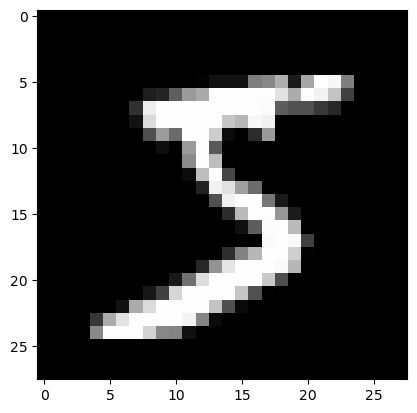

In [165]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


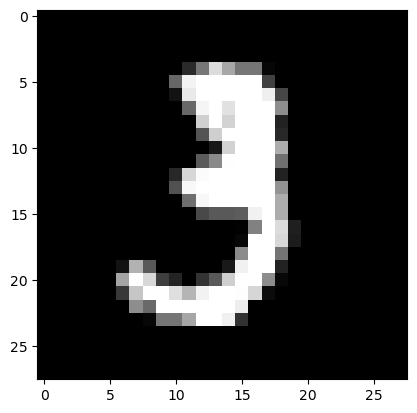

In [166]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

Essas imagens são relativamente pequenas em tamanho, e reconhecer os dígitos contidos nelas às vezes pode ser um desafio até mesmo para um ser humano. 

Há um complicador a ser vencido neste ponto: o PyTorch não sabe como trabalhar com imagens. Precisamos converter as imagens em tensores. Podemos fazer isso especificando uma **transformação** ao criar nosso conjunto de dados.

In [167]:
import torchvision.transforms as transforms

Os conjuntos de dados PyTorch nos permitem especificar uma ou mais funções de transformação que são aplicadas às imagens à medida que são carregadas. O módulo `torchvision.transforms` contém muitas dessas funções predefinidas. Usaremos a transformação `ToTensor` para converter imagens do MNIST em tensores PyTorch.

In [168]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [169]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


A imagem agora foi convertida em um tensor 1x28x28. A primeira dimensão representa canais de cores. A segunda e terceira dimensões representam pixels ao longo da altura e da largura da imagem, respectivamente. Como as imagens no conjunto de dados MNIST são em tons de cinza, há apenas um canal de cor. Outros conjuntos de dados possuem imagens coloridas, caso em que existem três canais: vermelho, verde e azul (RGB).

Vejamos alguns valores de amostra dentro do tensor:

In [170]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


Os valores variam de 0 a 1, com 0 representando preto, 1 branco, e os valores intermediários os diferentes tons de cinza. Também podemos plotar o tensor como uma imagem usando `plt.imshow`.

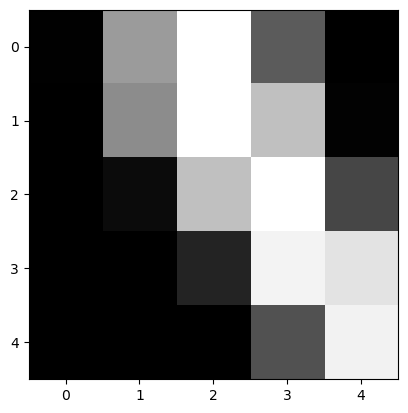

In [171]:
# Plot parte of the image by passing
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

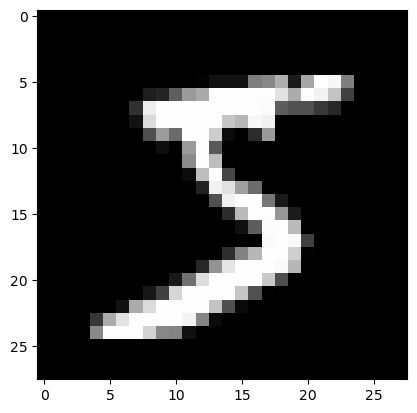

In [172]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,:,:], cmap='gray')

## Conjuntos de dados de treinamento e validação
Ao construir modelos de aprendizado de máquina em aplicações reais, é bastante comum dividir o conjunto de dados original em três partes:

- *Conjunto de treinamento* - usado para treinar o modelo, ou seja, calcular o custo e ajustar os pesos do modelo usando gradiente descendente.

- *Conjunto de validação* - usado para avaliar o modelo durante o treinamento, ajustar hiperparâmetros (taxa de aprendizado etc.) e escolher a melhor versão do modelo.

- *Conjunto de teste* - usado para comparar diferentes modelos ou abordagens e computar uma estimativa do [*erro de generalização*](https://en.wikipedia.org/wiki/Generalization_error) do modelo.

No conjunto de dados MNIST, existem 60.000 imagens de treinamento e 10.000 imagens de teste. O conjunto de testes é padronizado para que diferentes pesquisadores possam relatar os resultados de seus modelos na mesma coleção de imagens.

Como não há um conjunto de validação predefinido, devemos dividir manualmente as 60.000 imagens em conjuntos de dados de treinamento e validação. Vamos separar 10.000 imagens escolhidas aleatoriamente para validação. Podemos fazer isso usando o método random_spilt do PyTorch.

In [173]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

É essencial escolher uma amostra aleatória para criar um conjunto de validação. Os dados de treinamento são frequentemente ordenados pelos rótulos. No caso do MNIST, isso corresponderia a imagens de 0s seguidas de 1s, por sua vez seguidas de 2s, etc. Se criarmos um conjunto de validação usando os últimos 20% das imagens, ele consistirá apenas em 8s e 9s. Em contraste, o conjunto de treinamento não conteria 8s ou 9s. Tal configuração tornaria impossível treinar um modelo útil.

Agora podemos criar objetos `DataLoader` para carregar os dados em lotes durante o treinamento. Usaremos um tamanho de lote de 128.

In [174]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Definimos `shuffle = True` para o carregador de dados de treinamento para garantir que os lotes gerados em cada época sejam diferentes. Esta randomização ajuda a generalizar e acelerar o processo de treinamento. Por outro lado, como o carregador de dados de validação é usado apenas para avaliar o modelo, não há necessidade de embaralhar suas imagens.

## Modelo

Agora que preparamos nossos carregadores de dados, podemos definir nosso modelo. Como temos um problema de classificação, iremos usar o algoritmo de **regressão logística** para treinar nosso modelo.

Um modelo de regressão logística é quase idêntico a um modelo de regressão linear. Ele contém pesos e viéses. A saída também é obtida usando operações de matriz simples (pred = x @ w.t () + b).

Como fizemos com a regressão linear, podemos usar [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) para criar o modelo em vez de criar e inicializar manualmente as matrizes.

`nn.Linear` espera que cada exemplo de treinamento seja um tensor uni-dimensional. Por conta disso, cada tensor de imagem 1x28x28 é reformatado em um vetor de tamanho 784 (28 * 28) antes de ser passado para o modelo.

A saída produzida pelo modelo para cada imagem é um vetor de tamanho 10, com cada elemento significando a probabilidade de um rótulo alvo específico (ou seja, 0 a 9). O rótulo previsto para uma imagem é simplesmente aquele com a maior probabilidade.

In [175]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Repare que este modelo é muito maior do que nosso modelo anterior (de regressão linear) em termos de número de parâmetros. Vamos inspecionar os pesos e vieses.

In [176]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0010,  0.0041,  0.0229,  ...,  0.0301, -0.0005, -0.0108],
        [ 0.0069, -0.0032,  0.0183,  ...,  0.0336, -0.0042,  0.0195],
        [-0.0330,  0.0013, -0.0213,  ...,  0.0141,  0.0145, -0.0104],
        ...,
        [ 0.0116, -0.0117,  0.0118,  ...,  0.0185,  0.0145, -0.0095],
        [-0.0331, -0.0076,  0.0278,  ...,  0.0140, -0.0186, -0.0213],
        [ 0.0106, -0.0113, -0.0177,  ...,  0.0072, -0.0328,  0.0030]],
       requires_grad=True)

In [177]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0019,  0.0170,  0.0346, -0.0081, -0.0078,  0.0268,  0.0104,  0.0230,
        -0.0089,  0.0100], requires_grad=True)

Embora haja um total de 7.850 parâmetros aqui, conceitualmente, nada mudou até agora. Vamos tentar gerar algumas saídas usando nosso modelo. Vamos pegar o primeiro lote de 100 imagens de nosso conjunto de dados e passá-las para nosso modelo.

In [178]:
# Descomente o código abaixo e verifique que ele gera um erro de execução!
# for images, labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs = model(images)
#     print(outputs)
#     break

In [179]:
images.shape

torch.Size([128, 1, 28, 28])

In [180]:
images.reshape(128, 784).shape

torch.Size([128, 784])

O código acima leva a um erro porque nossos dados de entrada não têm o formato correto. Nossas imagens têm o formato 1x28x28, mas precisamos que sejam vetores de tamanho 784, ou seja, precisamos reformatá-las. Usaremos o método `.reshape` de um tensor, o que nos permitirá 'visualizar' com eficiência cada imagem como um vetor, sem realmente criar uma cópia dos dados subjacentes. Para incluir essa funcionalidade adicional em nosso modelo, precisamos definir um modelo personalizado estendendo a classe `nn.Module` do PyTorch.

In [181]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Dentro do construtor (`__init__`), instanciamos os pesos e vieses usando `nn.Linear`. E dentro do método `forward`, que é automaticamente invocado quando passamos um lote de entradas para o modelo, reformatamos o tensor de entrada e o passamos para `self.linear`.

`xb.reshape(-1, 28 * 28)` indica ao PyTorch que queremos uma visão do tensor `xb` com duas dimensões. O comprimento ao longo da 2ª dimensão é 28 * 28 (ou seja, 784). Um argumento para .reshape pode ser definido como -1 (neste caso, a primeira dimensão) para permitir que o PyTorch descubra isso automaticamente com base na forma do tensor original.

Observe que o modelo não tem mais os atributos `.weight` e `.bias` (pois agora estão dentro do atributo `.linear`), mas tem um método `.parameters` que retorna uma lista contendo os pesos e bias.

In [182]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [183]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-3.3102e-02,  3.4579e-02, -7.4898e-03,  ..., -1.7732e-02,
           2.3662e-02,  1.9418e-02],
         [-1.7279e-02, -1.6998e-02, -2.0371e-02,  ...,  2.5716e-02,
          -1.5179e-02,  7.0182e-03],
         [-3.0283e-02, -4.9965e-04,  2.0081e-02,  ..., -3.2806e-02,
           8.9162e-03,  1.0992e-03],
         ...,
         [-3.4188e-02, -3.2258e-02, -2.9959e-02,  ...,  3.0461e-02,
          -1.6614e-02, -2.4589e-03],
         [ 1.0604e-02,  3.4981e-02,  1.5154e-02,  ...,  7.5801e-03,
          -2.5336e-02, -3.0485e-02],
         [-2.1950e-02, -2.8826e-02, -3.5220e-02,  ..., -1.8363e-02,
           4.1063e-05,  3.0005e-03]], requires_grad=True),
 Parameter containing:
 tensor([-0.0191, -0.0321,  0.0342,  0.0054, -0.0087,  0.0238,  0.0150, -0.0324,
         -0.0219,  0.0124], requires_grad=True)]

Podemos usar nosso modelo para fazer previsões (classificações) assim como anteriormente:

In [184]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0105,  0.0111, -0.2764, -0.0282,  0.2694,  0.1769,  0.0919, -0.0615,
         -0.1278, -0.0148],
        [-0.1529, -0.0582, -0.4152,  0.4328,  0.4050,  0.0627,  0.0220, -0.2563,
          0.1372, -0.0519]])


Para cada uma das 100 imagens de entrada, obtemos 10 saídas, uma para cada classe. Conforme discutido anteriormente, gostaríamos que essas saídas representassem probabilidades. Cada elemento da linha de saída deve estar entre 0 e 1 e somar 1, o que não é o caso atualmente.

Para converter as linhas de saída em probabilidades, usamos a função [softmax](https://en.wikipedia.org/wiki/Softmax_function).

<center><img src='https://vitalflux.com/wp-content/uploads/2020/10/Softmax-Function-300x152.png'></center>

Embora seja fácil implementar a função softmax (você deve tentar!), usaremos a implementação fornecida no PyTorch porque funciona bem com tensores multidimensionais.

A função `softmax` está incluída no pacote `torch.nn.functional` e exige que especifiquemos uma dimensão ao longo da qual a função deve ser aplicada.

In [185]:
outputs[:2]

tensor([[ 0.0105,  0.0111, -0.2764, -0.0282,  0.2694,  0.1769,  0.0919, -0.0615,
         -0.1278, -0.0148],
        [-0.1529, -0.0582, -0.4152,  0.4328,  0.4050,  0.0627,  0.0220, -0.2563,
          0.1372, -0.0519]], grad_fn=<SliceBackward0>)

In [186]:
import torch.nn.functional as F

# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0995, 0.0996, 0.0747, 0.0957, 0.1289, 0.1175, 0.1079, 0.0926, 0.0866,
         0.0970],
        [0.0820, 0.0902, 0.0631, 0.1474, 0.1433, 0.1018, 0.0977, 0.0740, 0.1097,
         0.0908]])
Sum:  0.9999999403953552


Finalmente, podemos determinar o rótulo previsto para cada imagem simplesmente escolhendo o índice do elemento com a maior probabilidade em cada linha de saída. Podemos fazer isso usando `torch.max`. Esta função retorna o maior elemento de cada linha e o índice correspondente.

In [187]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1289, 0.1474, 0.1221, 0.1239, 0.1174, 0.1159, 0.1164, 0.1272, 0.1265,
        0.1351, 0.1697, 0.1216, 0.1206, 0.1117, 0.1413, 0.1344, 0.1588, 0.1267,
        0.1132, 0.1427, 0.1222, 0.1333, 0.1335, 0.1849, 0.1518, 0.1147, 0.1376,
        0.1306, 0.1224, 0.1358, 0.1234, 0.1233, 0.1139, 0.1741, 0.1181, 0.1426,
        0.1174, 0.1210, 0.1320, 0.1277, 0.1278, 0.1210, 0.1245, 0.1229, 0.1129,
        0.1406, 0.1304, 0.1145, 0.1114, 0.1099, 0.1203, 0.1278, 0.1563, 0.1343,
        0.1345, 0.1245, 0.1314, 0.1129, 0.1501, 0.1324, 0.1320, 0.1182, 0.1139,
        0.1266, 0.1616, 0.1349, 0.1386, 0.1367, 0.1366, 0.1449, 0.1798, 0.1935,
        0.1228, 0.1131, 0.1302, 0.1364, 0.1388, 0.1456, 0.1248, 0.1237, 0.1385,
        0.1374, 0.1406, 0.1323, 0.1379, 0.1235, 0.1176, 0.1719, 0.1497, 0.1213,
        0.1276, 0.1621, 0.1150, 0.1262, 0.1353, 0.1392, 0.1522, 0.1334, 0.1196,
        0.1226, 0.1158, 0.1128, 0.1625, 0.1528, 0.1225, 0.1435, 0.1757, 0.1272,
        0.1278, 0.1445, 0.1562, 0.1349, 

Os números impressos no segundo tensor acima são os rótulos previstos para o primeiro lote de imagens de treinamento. Vamos compará-los com os rótulos reais.

In [188]:
 labels

tensor([3, 3, 2, 9, 8, 2, 3, 0, 8, 9, 8, 1, 7, 9, 2, 9, 2, 5, 7, 0, 9, 5, 1, 6,
        3, 3, 6, 6, 2, 3, 9, 1, 4, 6, 5, 6, 2, 3, 7, 0, 3, 4, 8, 1, 3, 0, 1, 4,
        1, 1, 1, 1, 9, 3, 3, 6, 7, 7, 3, 6, 4, 3, 7, 9, 6, 1, 4, 7, 9, 0, 8, 6,
        9, 2, 2, 3, 6, 6, 9, 3, 5, 7, 9, 0, 0, 0, 1, 8, 8, 7, 3, 9, 0, 0, 7, 5,
        6, 1, 4, 5, 3, 2, 3, 4, 9, 6, 4, 9, 1, 6, 0, 0, 7, 1, 3, 0, 5, 3, 6, 3,
        7, 6, 1, 2, 9, 2, 7, 4])

A maioria dos rótulos previstos são diferentes dos rótulos reais. Isso porque começamos com pesos e vieses inicializados aleatoriamente. Precisamos treinar o modelo, ou seja, ajustar os pesos usando gradiente descendente para fazer melhores previsões

## Medida de Avaliação - Acurácia

Assim como com a regressão linear, precisamos encontrar uma maneira de avaliar o desempenho de nosso modelo. Uma maneira natural de fazer isso seria encontrar a porcentagem de rótulos que foram previstos corretamente, ou seja, a **acurácia** (*accuracy*) das previsões realizadas pelo modelo.

A função a seguir implementa a computação da métrica denominada acurácia.

In [189]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

No código acima:
- O operador == executa uma comparação elemento a elemento de dois tensores com a mesma forma e retorna um tensor (de mesma dimensão que os operandos) contendo `True` para elementos iguais e `False` para elementos desiguais. 
- Passar o resultado para `torch.sum` retorna o número de rótulos que foram previstos corretamente. Finalmente, dividimos pelo número total de imagens para obter a acurácia.

Observe que não precisamos aplicar softmax às saídas, pois seus resultados têm a mesma ordem relativa. Isso ocorre porque $e^x$ é uma função crescente, ou seja, se $y_1> y_2$, então $e^{y_1}$> $e^{y_2}$. O mesmo é válido após a média dos valores para obter o softmax.

Vamos calcular a acurácia do modelo atual no primeiro lote:

In [190]:
accuracy(outputs, labels)

tensor(0.1172)

In [191]:
probs

tensor([[0.0995, 0.0996, 0.0747,  ..., 0.0926, 0.0866, 0.0970],
        [0.0820, 0.0902, 0.0631,  ..., 0.0740, 0.1097, 0.0908],
        [0.1173, 0.0868, 0.0983,  ..., 0.0933, 0.0915, 0.0962],
        ...,
        [0.1141, 0.0948, 0.1065,  ..., 0.0845, 0.1001, 0.0788],
        [0.0792, 0.1123, 0.1311,  ..., 0.0851, 0.1199, 0.0882],
        [0.0961, 0.0808, 0.0945,  ..., 0.0843, 0.0859, 0.1119]],
       grad_fn=<SoftmaxBackward0>)

A acurácia é uma excelente forma para nós (humanos) avaliarmos o modelo. No entanto, não podemos usar essa medida como uma função de custo para otimizar nosso modelo usando gradiente descendente pelos seguintes motivos:

- Não é uma função diferenciável. `torch.max` e `==` são operações não contínuas e não diferenciáveis, portanto, não podemos usar a acurácia para calcular gradientes com os pesos e vieses.

- Não leva em consideração as probabilidades reais previstas pelo modelo. Portanto, não pode fornecer feedback suficiente para melhorias incrementais.

Por essas razões, a acurácia é freqüentemente usada como uma métrica de avaliação para classificação, mas não como uma função de custo.

## Função de Custo - Entropia Cruzada

Uma função de custo comumente usada para problemas de classificação é a [entropia cruzada](https://www.dropbox.com/s/4h1e2bteow52xjl/CrossEntropy.pptx?dl=0). Para um problema de classificação binária, essa função de custo é representada pela seguinte fórmula:

$$
\begin{aligned}
\mathbf{J}(W^{1}, b^{1}, W^{2}, b^{2}, \ldots, W^{L},b^{L})\ &=\ {\frac {1}{m}}\sum _{i=1}^{m}H(p_{i},q_{i})\ =\ -{\frac {1}{m}}\sum _{i=1}^{m}\ {\bigg [}y^{(i)}\log({\hat {y}}^{(i)})+(1-y^{(i)})\log(1-{\hat {y}}^{(i)}){\bigg ]}
\end{aligned}
$$

Na expressão acima, 

- $y^{(i)}$ corresponde à classe do $i$-ésimo exemplo ($1 \leq i \leq m$). Repare que $y^{(i)} \in \{0,1\}$.

- $\hat{y}^{(i)}$ à saída do modelo para o $i$-ésimo exemplo. Repare que $0 \leq \hat{y}^{(i)} \leq 1$.

Para o caso de mais do que duas classes, o cálculo do valor da entropia cruzada é feito conforme detalhamento a seguir:

- Para cada linha de saída, escolha a probabilidade prevista para o rótulo correto. Por exemplo, se as probabilidades previstas para uma imagem são $[0.1, 0.3, 0.2, \ldots]$ e o rótulo correto é $1$, escolhemos o elemento correspondente $0.3$ e ignoramos o resto.

- Então, calcule o logaritmo da probabilidade escolhida. Se a probabilidade for alta, ou seja, perto de $1$, então seu logaritmo é um valor negativo muito pequeno, próximo a $0$. E se a probabilidade for baixa (perto de $0$), então o logaritmo é um valor negativo muito grande. Também multiplicamos o resultado por $-1$, que resulta em um grande valor positivo da função de custo para previsões ruins.

- Finalmente, calcule a média da entropia cruzada sobre todas as unidades de saída para obter o custo.

Ao contrário da acurácia, a entropia cruzada é uma função contínua e diferenciável. Por conta disso, ela também fornece *feedback* útil para melhorias incrementais no modelo (uma probabilidade ligeiramente maior para o rótulo correto leva a um custo menor). Esses dois fatores tornam a entropia cruzada uma escolha melhor como função de custo.

O PyTorch fornece uma implementação da entropia cruzada como parte do pacote `torch.nn.functional`. Essa implementação executa softmax internamente, de forma que podemos passar diretamente as saídas do modelo sem antes precisar convertê-las em valores de probabilidade.

In [192]:
outputs

tensor([[ 0.0105,  0.0111, -0.2764,  ..., -0.0615, -0.1278, -0.0148],
        [-0.1529, -0.0582, -0.4152,  ..., -0.2563,  0.1372, -0.0519],
        [ 0.1333, -0.1680, -0.0439,  ..., -0.0957, -0.1151, -0.0651],
        ...,
        [ 0.1468, -0.0388,  0.0780,  ..., -0.1539,  0.0159, -0.2231],
        [-0.2325,  0.1171,  0.2716,  ..., -0.1599,  0.1827, -0.1245],
        [-0.0560, -0.2295, -0.0727,  ..., -0.1863, -0.1680,  0.0968]],
       grad_fn=<AddmmBackward0>)

In [193]:
loss_fn = F.cross_entropy

In [194]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3331, grad_fn=<NllLossBackward0>)


Sabemos que a entropia cruzada é o logaritmo negativo da probabilidade prevista do rótulo correto calculada pela média de todas as amostras de treinamento. Portanto, uma maneira de interpretar o número resultante, por exemplo, $2.23$ é olhar para $e^{-2.23}$ que é cerca de $0.1$ como a probabilidade prevista do rótulo correto, em média. Quanto menor for o custo, melhor será o modelo.

## Treinamento do modelo

Agora que definimos os carregadores de dados, o modelo, a função de custo e o otimizador, estamos prontos para treinar o modelo. O processo de treinamento é idêntico à regressão linear, com a adição de uma "fase de validação" para avaliar o modelo em cada época. Esta é a aparência em pseudocódigo:

para época no intervalo (num_epochs):
    # Fase de treinamento
    para lote em train_loader:
        # Gerar previsões
        # Calcular o custo
        # Calcular gradientes
        # Atualizar parâmetros
        # Redefinir gradientes
    
    # Fase de validação
    para lote em val_loader:
        # Gerar previsões
        # Calcular o custo
        # Calcular métricas (acurácia etc.)
    # Calcular custo médio de validação e métricas
    
    # Registrar época, custo e métricas para inspeção

Algumas partes do ciclo de treinamento são particulares ao problema específico que estamos resolvendo (por exemplo, função de custo, métricas etc.), enquanto outras são genéricas e podem ser aplicadas a qualquer problema de aprendizado profundo.

Incluiremos as partes independentes do problema em uma função chamada `fit`, que será usada para treinar o modelo. As partes específicas do problema serão implementadas adicionando novos métodos à classe `nn.Module`.

In [195]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

A função `fit` registra o custo medido sobre o conjunto de validação e a métrica de cada época. Ele retorna um histórico do treinamento, útil para depuração e visualização.

Configurações como tamanho do lote, taxa de aprendizado, etc. (chamados de *hiperparâmetros*), precisam ser escolhidas com antecedência durante o treinamento de modelos de aprendizado de máquina. A escolha dos hiperparâmetros corretos é fundamental para treinar um modelo razoavelmente preciso dentro de um período de tempo razoável. A [otimização de hiperparâmetros](https://en.wikipedia.org/wiki/Hyperparameter_optimization) é uma área ativa de pesquisa em aprendizado de máquina.


Vamos definir a função `evaluate`, usada na fase de validação da função `fit`.

In [196]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

Finalmente, vamos redefinir a classe MnistModel para incluir métodos adicionais `training_step`, `validation_step`, `validation_epoch_end` e `epoch_end` usados ​​por ajustar e avaliar.

In [197]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

Antes de treinarmos o modelo, vamos ver como ele se sai no conjunto de validação com o conjunto inicial de pesos e vieses inicializados aleatoriamente.

In [198]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.2982661724090576, 'val_acc': 0.10848496854305267}

A acurácia inicial é de cerca de 10%, o que se poderia esperar de um modelo inicializado aleatoriamente (uma vez que tem uma chance de 1 em 10 de acertar um rótulo por adivinhar aleatoriamente).

Agora estamos prontos para treinar o modelo. Vamos treinar cinco épocas e ver os resultados.

In [199]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9454, val_acc: 0.6156
Epoch [1], val_loss: 1.6808, val_acc: 0.7232
Epoch [2], val_loss: 1.4825, val_acc: 0.7616
Epoch [3], val_loss: 1.3323, val_acc: 0.7825
Epoch [4], val_loss: 1.2163, val_acc: 0.7972


In [200]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1249, val_acc: 0.8071
Epoch [1], val_loss: 1.0513, val_acc: 0.8159
Epoch [2], val_loss: 0.9910, val_acc: 0.8230
Epoch [3], val_loss: 0.9407, val_acc: 0.8276
Epoch [4], val_loss: 0.8982, val_acc: 0.8320


In [201]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8616, val_acc: 0.8359
Epoch [1], val_loss: 0.8299, val_acc: 0.8398
Epoch [2], val_loss: 0.8021, val_acc: 0.8425
Epoch [3], val_loss: 0.7776, val_acc: 0.8438
Epoch [4], val_loss: 0.7556, val_acc: 0.8449


In [202]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7360, val_acc: 0.8472
Epoch [1], val_loss: 0.7183, val_acc: 0.8489
Epoch [2], val_loss: 0.7022, val_acc: 0.8501
Epoch [3], val_loss: 0.6875, val_acc: 0.8517
Epoch [4], val_loss: 0.6741, val_acc: 0.8547


Embora a acurácia continue a aumentar à medida que treinamos por mais épocas, as melhorias ficam menores a cada época. Vamos visualizar isso usando um gráfico de linha.

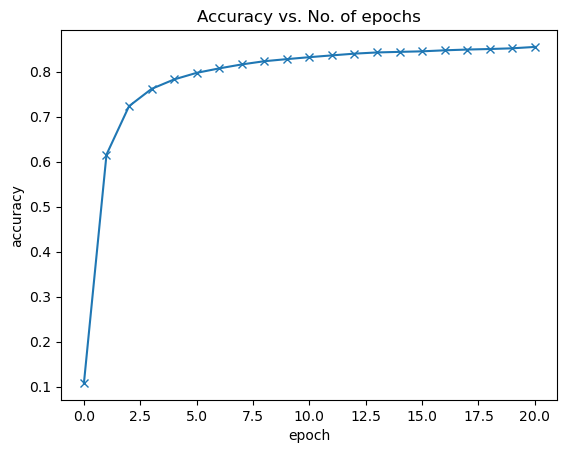

In [203]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

Ao analisar a imagem acima, podemos concluir que o modelo provavelmente não ultrapassará o limite de acurácia de 90%, mesmo após um treinamento por muito tempo. Uma possível razão para isso é que a taxa de aprendizagem pode ser muito alta. Os parâmetros do modelo podem estar "saltando" em torno do conjunto ideal de parâmetros para o custo mais baixo. Você pode tentar reduzir a taxa de aprendizado e treinar por mais algumas épocas para ver se isso ajuda.

Entretanto, o motivo mais provável para desempenho preditivo relativamente baixo é que simplesmente do modelo não é poderoso o suficiente. Se você se lembrar de nossa hipótese inicial, estamos presumindo que a saída (neste caso, as probabilidades de cada classe) é uma **função linear** da entrada (intensidades de pixel), obtida por meio da multiplicação da matriz de dados $X$ com a matriz de pesos $W$ e da adição do viés $b$. Esta é uma suposição forte, pois pode não existir realmente uma relação linear entre as intensidades de pixel em uma imagem e o dígito que ela representa. Embora funcione razoavelmente bem para um conjunto de dados simples como MNIST (nos levando a 85% de acurácia), precisamos de modelos mais sofisticados que possam capturar **relações não lineares** entre pixels de imagem e rótulos para tarefas complexas, como reconhecimento de objetos do cotidiano, animais etc.

## Testando o modelo

Embora tenhamos rastreado a acurácia geral de um modelo até agora, também é uma boa ideia olhar os resultados do modelo em algumas imagens de amostra. Vamos testar nosso modelo com algumas imagens do conjunto de dados de teste predefinido de 10.000 imagens. Começamos recriando o conjunto de dados de teste com a transformação `ToTensor`.

In [204]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Aqui está uma das imagens do conjunto de teste:

Shape: torch.Size([1, 28, 28])
Label: 7


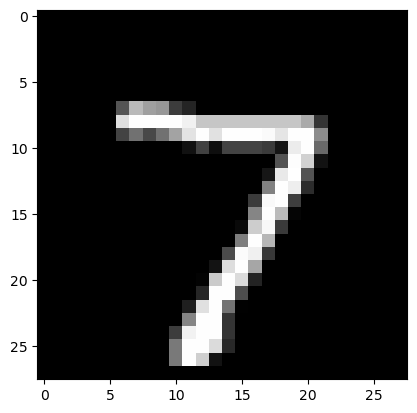

In [205]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Vamos definir uma função auxiliar `predict_image`, que retorna o rótulo previsto para um único tensor de imagem.

In [206]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

A função `img.unsqueeze` simplesmente adiciona outra dimensão no início do tensor de dimensões 1x28x28, tornando-o um tensor de dimensões 1x1x28x28. O modelo visualiza esse tensor resultante como um lote contendo uma única imagem.

Vamos experimentar a predição com algumas imagens.

Label: 7 , Predicted: 7


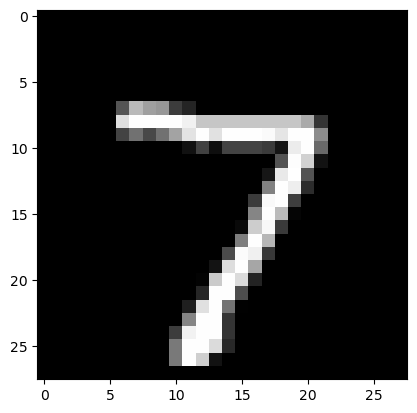

In [207]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


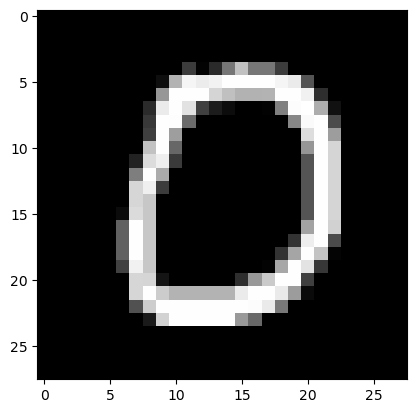

In [208]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


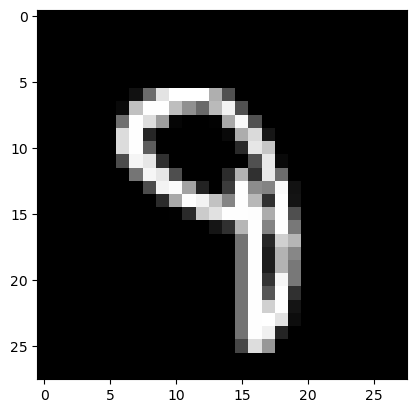

In [209]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


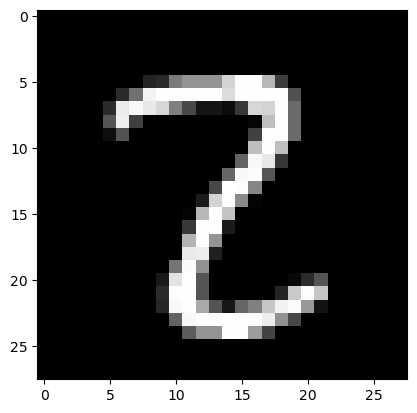

In [210]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identificar onde nosso modelo tem um desempenho insatisfatório pode nos ajudar a melhorá-lo, coletando mais dados de treinamento, aumentando / diminuindo a complexidade do modelo e alterando os hiperparâmetros.

Como uma etapa final, vamos também examinar a custo total e a acurácia do modelo medidos no conjunto de teste.

In [211]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6404061317443848, 'val_acc': 0.861328125}

Em geral, esperamos que o desempenho preditivo medido no conjunto de teste seja semelhante ao medido no conjunto de validação. Do contrário, podemos precisar de um conjunto de validação melhor que tenha dados e distribuição semelhantes ao conjunto de teste (que geralmente vem de dados do mundo real).

## Salvando e carregando o modelo

Como treinamos nosso modelo por muito tempo e alcançamos uma acurácia razoável, é uma boa ideia salvar o *estado* do modelo (i.e., as matrizes de pesos e as matrizes de víes) no disco, para que possamos reutilizar o modelo posteriormente e evitar a necessidade de um novo treinamento desde o início. Veja na célula de código a seguir como você pode salvar o modelo.

In [212]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

O método `.state_dict` retorna uma variável do tipo [`OrderedDict`](https://docs.python.org/3/library/collections.html#collections.OrderedDict) contendo todas as matrizes de pesos ($W$) e de viés ($b$) do modelo.

In [213]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0245, -0.0146,  0.0004,  ..., -0.0156, -0.0284,  0.0340],
                      [ 0.0141,  0.0176, -0.0134,  ..., -0.0247, -0.0233,  0.0090],
                      [-0.0061, -0.0265,  0.0076,  ..., -0.0223,  0.0284, -0.0253],
                      ...,
                      [-0.0100, -0.0146,  0.0083,  ..., -0.0060, -0.0339, -0.0126],
                      [-0.0005,  0.0307,  0.0352,  ...,  0.0171, -0.0131, -0.0087],
                      [-0.0221, -0.0098,  0.0291,  ...,  0.0086,  0.0153, -0.0085]])),
             ('linear.bias',
              tensor([-0.0468,  0.0661, -0.0026, -0.0532,  0.0309,  0.0803,  0.0111,  0.0213,
                      -0.0606, -0.0366]))])

Para restaurar o modelo para a memória, podemos instanciar um novo objeto da classe `MnistModel` e usar o método `torch.nn.Module.load_state_dict`.

In [218]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))

/tmp/ipykernel_20203/3084339741.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logistic.pth'))


<All keys matched successfully>

In [219]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0245, -0.0146,  0.0004,  ..., -0.0156, -0.0284,  0.0340],
                      [ 0.0141,  0.0176, -0.0134,  ..., -0.0247, -0.0233,  0.0090],
                      [-0.0061, -0.0265,  0.0076,  ..., -0.0223,  0.0284, -0.0253],
                      ...,
                      [-0.0100, -0.0146,  0.0083,  ..., -0.0060, -0.0339, -0.0126],
                      [-0.0005,  0.0307,  0.0352,  ...,  0.0171, -0.0131, -0.0087],
                      [-0.0221, -0.0098,  0.0291,  ...,  0.0086,  0.0153, -0.0085]])),
             ('linear.bias',
              tensor([-0.0468,  0.0661, -0.0026, -0.0532,  0.0309,  0.0803,  0.0111,  0.0213,
                      -0.0606, -0.0366]))])

Como uma [verificação de sanidade](https://en.wikipedia.org/wiki/Sanity_check), vamos verificar se este modelo apresenta o mesmo custo e acurácia no conjunto de teste.

In [221]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6404061317443848, 'val_acc': 0.861328125}

Para mais detalhes sobre serialização e desserialização de modelos no PyTorch, consulte o documento [Saving and Loading Models](https://pytorch.org/tutorials/beginner/saving_loading_models.html).